# Sentiment Analysis of Amazon Customer Feedback

This notebook analyzes customer feedback from Amazon reviews using two sentiment analysis techniques:

- **VADER (Valence Aware Dictionary and sEntiment Reasoner)** from NLTK
- **RoBERTa (Robustly Optimized BERT Pretraining Approach)**, a transformer model from Hugging Face

The goal is to compare both models across reviews with different star ratings and highlight which performs better.

## Data Overview

We start by reading a sample of 500 reviews from the `Reviews.csv` dataset. The key columns include:
- `Score`: the rating given by the reviewer (1–5 stars)
- `Text`: the full written review

We’ll use the `Text` column to perform sentiment analysis.

## VADER Sentiment Analysis

VADER is a rule-based model optimized for social media text. It:
- Removes stopwords
- Assigns sentiment scores to words and averages them for the sentence

We calculate positive, neutral, and negative scores using VADER, then analyze how these scores align with the star ratings.

## RoBERTa Sentiment Analysis

RoBERTa is a transformer-based model that:
- Understands sentence context better
- Does not remove stopwords, capturing nuanced sentiment

We use the `cardiffnlp/twitter-roberta-base-sentiment-latest` model to compute sentiment probabilities.

## Visual Comparison

Below are the plots comparing sentiment score distributions for each star rating (1–5):

- **VADER** shows more neutral scores across ratings with limited spread.
- **RoBERTa** better differentiates sentiment by rating. Low ratings strongly correlate with high negative sentiment scores and vice versa.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\RJ201319\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\RJ201319\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\RJ201319\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\RJ201319\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RJ201319\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [60]:
# Read in data
df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [61]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


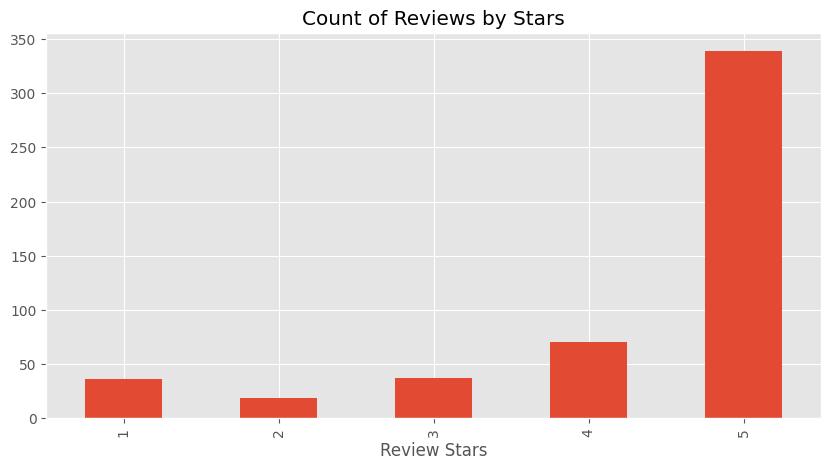

In [62]:
scores = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
scores.set_xlabel('Review Stars')
plt.show()

### BASIC NLTK

In [63]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [64]:
review = df['Text'][5]

In [65]:
review

'I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.'

In [66]:
#Tokenization
tokens = nltk.word_tokenize(review)
tokens[:10]

['I', 'got', 'a', 'wild', 'hair', 'for', 'taffy', 'and', 'ordered', 'this']

In [67]:
#Part of Speech Tagging
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('got', 'VBD'),
 ('a', 'DT'),
 ('wild', 'JJ'),
 ('hair', 'NN'),
 ('for', 'IN'),
 ('taffy', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('this', 'DT')]

### Step 1. VADER Sentiment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [68]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [69]:
review

'I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.'

In [70]:
sia.polarity_scores(review)

{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [71]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [72]:
sentiment = pd.DataFrame(res).T

In [73]:
sentiment

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [74]:
sentiment = sentiment.reset_index().rename(columns={'index': 'Id'})

In [75]:
sentiment.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound'], dtype='object')

In [76]:
sentiment = sentiment.merge(df, how='left')

In [77]:
# Now we have sentiment score and metadata
sentiment.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Step 2: Plotting VADER Results

C:\Users\RJ201319\AppData\Local\Temp\ipykernel_33832\2141768007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment, x='Score', y='pos', ax=axs[0], palette=palette)
C:\Users\RJ201319\AppData\Local\Temp\ipykernel_33832\2141768007.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment, x='Score', y='neu', ax=axs[1], palette=palette)
C:\Users\RJ201319\AppData\Local\Temp\ipykernel_33832\2141768007.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment, x='Score', y='neg', ax=axs[2], palette=palette)


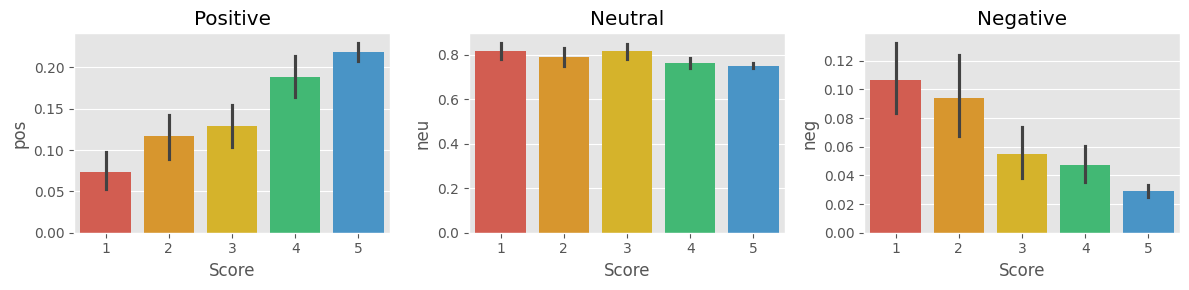

In [78]:
# Define the same custom color palette
palette = {'1': '#e74c3c', '2': '#f39c12', '3': '#f1c40f', '4': '#2ecc71', '5': '#3498db'}

# Plot the barplot with the palette
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=sentiment, x='Score', y='pos', ax=axs[0], palette=palette)
sns.barplot(data=sentiment, x='Score', y='neu', ax=axs[1], palette=palette)
sns.barplot(data=sentiment, x='Score', y='neg', ax=axs[2], palette=palette)

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

### Step 3. Roberta Pretrained Model¶
Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words.

In [49]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [50]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [53]:
# VADER results on example
print(review)
sia.polarity_scores(review)

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [54]:
# Run for Roberta Model
encoded_text = tokenizer(review, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.004591647), 'roberta_neu': np.float32(0.027828462), 'roberta_pos': np.float32(0.9675799)}


In [55]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [56]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [58]:
df_sentiment_combined = pd.DataFrame(res).T
df_sentiment_combined = df_sentiment_combined.reset_index().rename(columns={'index': 'Id'})
df_sentiment_combined = df_sentiment_combined.merge(df, how='left')
df_sentiment_combined[0:5]

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.010578,0.038816,0.950607,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.716768,0.271225,0.012007,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.005176,0.077858,0.916966,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002919,0.047125,0.949957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.004527,0.009283,0.986190,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Step 4. Plotting Roberta Results

C:\Users\RJ201319\AppData\Local\Temp\ipykernel_24656\1343163598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment, x='Score', y='roberta_pos', ax=axs[0], palette=palette)
C:\Users\RJ201319\AppData\Local\Temp\ipykernel_24656\1343163598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment, x='Score', y='roberta_neu', ax=axs[1], palette=palette)
C:\Users\RJ201319\AppData\Local\Temp\ipykernel_24656\1343163598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment, x='Score', y='roberta_neg', ax=axs[2], 

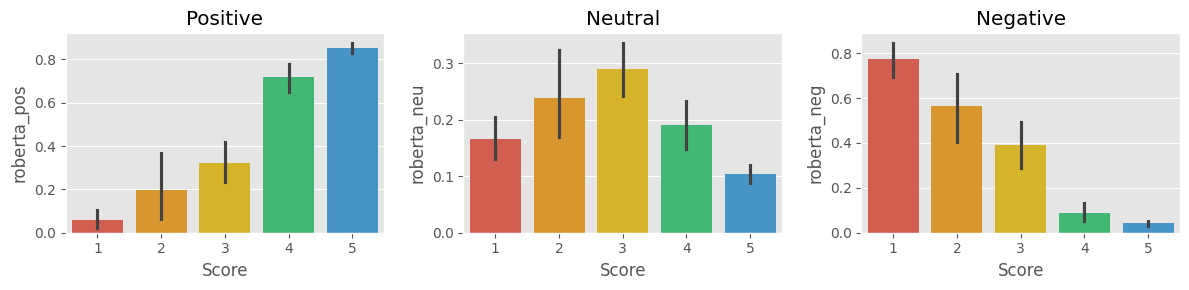

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=df_sentiment_combined, x='Score', y='roberta_pos', ax=axs[0], palette=palette)
sns.barplot(data=df_sentiment_combined, x='Score', y='roberta_neu', ax=axs[1], palette=palette)
sns.barplot(data=df_sentiment_combined, x='Score', y='roberta_neg', ax=axs[2], palette=palette)

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

## Conclusion

The RoBERTa model shows a clear peak in neutral sentiment scores for 3-star reviews, aligning well with the expectation that mid-range ratings reflect neutrality. In contrast, VADER assigns similarly high neutral scores to both 1-star and 3-star reviews, which is misleading. This highlights RoBERTa’s superior ability to capture nuanced sentiment patterns across rating levels.

While both models give some insight into review sentiment:

- **VADER** is quick and rule-based but struggles to capture complex sentiment.
- **RoBERTa** clearly outperforms VADER, especially in aligning with human ratings.

Roberta’s strength lies in its deep contextual understanding, making it more suitable for real-world sentiment analysis tasks.